# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [87]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
%matplotlib inline
df = pd.read_csv('data/human_body_temperature.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


<b> Is the distribution of body temperatures normal? </b>

We assume that this sample is representative of the population and size of sample (130) is large enough to state that sampling distribution of the mean of human body temperature is normal. Histogram shows it looks quite normal.

(array([  4.,   6.,  15.,  26.,  30.,  30.,  15.,   1.,   2.,   1.]),
 array([  96.3 ,   96.75,   97.2 ,   97.65,   98.1 ,   98.55,   99.  ,
          99.45,   99.9 ,  100.35,  100.8 ]),
 <a list of 10 Patch objects>)

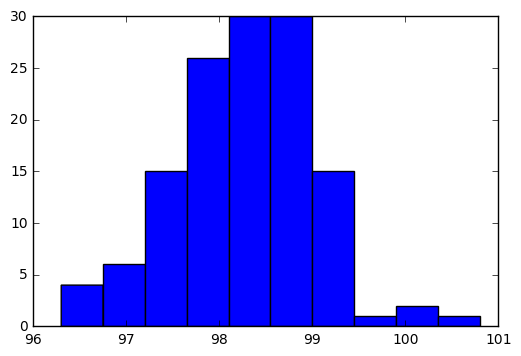

In [32]:
plt.hist(df['temperature'])

In [41]:
temp = df['temperature']
mu = temp.mean()
std = temp.std()
print (mu, std)

98.24923076923078 0.7331831580389454


Is the sample size large? Are the observations independent?
The sample size is relatively large as we have more than 30 observations

In [20]:
len(df)

130

<b> Is the true population mean really 98.6 degrees F? </b>

We don't know true population mean. Sample mean is equal to 98.25 with standard deviation 0.73

<b> Would you use a one-sample or two-sample test? Why? </b>

I would use one-sample test as we do not investigate difference between two different groups.

In [83]:
#one sample T test
onesample = stats.ttest_1samp(df['temperature'], 98.6)
print(onesample)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


<b> In this situation, is it appropriate to use the  tt  or  zz  statistic? </b>

We have more than 30 observations but we do not know population standard deviation, so we should use T statistics

- Now try using the other test. How is the result be different? Why?

<b> At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval. </b>

In [86]:
sample_size = len(df)
sample_std = df['temperature'].std()
sample_mean = df['temperature'].mean()
sample_sem = stats.sem(df['temperature'])
interval = (sample_mean - sample_sem, sample_mean + sample_sem)
print(interval)

#We should consider temperature as abnormal if it's outside ot this range

(98.184926352392893, 98.313535186068663)


<b> Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem </b>

In [81]:
#two sample T test
men = df[df['gender'] =='M']['temperature']
woman = df[df['gender'] =='F']['temperature']
twosample = stats.ttest_ind(men, woman)
print(twosample)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)


Two sample test determine wheter the means of two independ groups differ. 
We can accept null hypothesis that there is no significant difference between man and woman average mean because p-value of this test is below 5%